<a href="https://colab.research.google.com/github/d4ff4ad/Sistem-Pakar-Certainty-Factor-Fuzzy-Logic-/blob/main/CF%26Fuzzy_Logic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CF Multiple Penyakit** (Tugas E-Learning)

In [4]:
gejala_user = {
    "demam": 0.8,
    "batuk": 0.5,
    "sakit_tenggorokan": 0.5,
    "pilek": 0.3,
    "sakit_kepala": 0.6,
    "bersin": 0.4,
    "mata_merah": 0.9,
    "hidung_tersumbat": 0.8
}

pengetahuan = {
    "flu": {
        "demam": 0.8,
        "batuk": 0.7,
        "sakit_tenggorokan": 0.6,
        "pilek": 0.8,
        "sakit_kepala": 0.2,
        "bersin": 0.9,
        "mata_merah": 0.5,
        "hidung_tersumbat": 0.3
    }
}

def hitung_cf(gejala_user, pengetahuan_pakar):
    cf_total = 0
    first = True
    for gejala, cf_user in gejala_user.items():
        if gejala in pengetahuan_pakar:
            cf_pakar = pengetahuan_pakar[gejala]
            cf = cf_user * cf_pakar
            if first:
                cf_total = cf
                first = False
            else:
                cf_total = cf_total + cf * (1 - cf_total)
    return cf_total

cf_flu = hitung_cf(gejala_user, pengetahuan["flu"])
print(f"CF diagnosis Flu: {cf_flu:.2f}")


CF diagnosis Flu: 0.97


**Penjelasan**

untuk kasus pertama yang mengubah nilai cf gejala menjadi 0,2 maka hasil diagnosa flu akan menunjukan angka yang berbeda. Hal tersebut terjadi karena adanya perubahan perhitungan yang dilakukan, karena untuk menghasilkan nilai diagnosa memerlukan perhitungan yang melibatkan nilai CF tersebut.
dimana nilai cf pakar akan dikalikan dengan cf usser

contoh disini cf pakar adalah 0.8 untuk demam, dan cf user adalah 0,2 untuk demam. maka dua nilai tersebut akan dikalikan dan akan menjadi cf hasil yang nantinya akan dijumlahkan dengan nilai nilai dari gejala yang lain.

Kemudian dari kode diatas yang ditambahkan 5 gejala


```
        "pilek": 0.8,
        "sakit_kepala": 0.2,
        "bersin": 0.9,
        "mata_merah": 0.5,
        "hidung_tersumbat": 0.3
```


dan nilai dan user menginputkan data tersebut maka dengan perhitungan yang dijalankan oleh fungsi

```
def hitung_CF
```
maka menghasilkan 0,97 untuk nilai diagnosa penyakit flu.


**Diagnosa Multiple Penyakit dengan Bobot Gejala**

In [ ]:
gejala_user = {
    "nyeri_sendi": 0.8,
    "bengkak_sendi": 0.7,
    "kaku_sendi_pagi": 0.9,
    "demam_ringan": 0.3
}

pengetahuan = {
    "rheumatoid_arthritis": {
        "nyeri_sendi": 0.9,
        "bengkak_sendi": 0.8,
        "kaku_sendi_pagi": 0.9,
        "demam_ringan": 0.4
    },
    "osteoarthritis": {
        "nyeri_sendi": 0.8,
        "bengkak_sendi": 0.6,
        "kaku_sendi_pagi": 0.5
    }
}

def hitung_cf(gejala_user, pengetahuan_pakar):
    cf_total = 0
    first = True
    for gejala, cf_user in gejala_user.items():
        if gejala in pengetahuan_pakar:
            cf_pakar = pengetahuan_pakar[gejala]
            cf = cf_user * cf_pakar
            if first:
                cf_total = cf
                first = False
            else:
                cf_total = cf_total + cf * (1 - cf_total)
    return cf_total

# Mendiagnosa dua penyakit berdasarkan gejala yang sama
for penyakit in pengetahuan:
    cf_result = hitung_cf(gejala_user, pengetahuan[penyakit])
    print(f"CF diagnosis {penyakit}: {cf_result:.2f}")


CF diagnosis rheumatoid_arthritis: 0.98
CF diagnosis osteoarthritis: 0.89


**Example 4**

In [ ]:
# Gejala dari user
gejala_user = {
    "sering_haus": 0.8,
    "sering_buang_air_kecil": 0.9,
    "penurunan_berat_badan": 0.6,
    "luka_lambat_sembuh": 0.7,
    "penglihatan_kabur": 0.5
}

# Pengetahuan pakar berdasarkan penyakit
pengetahuan = {
    "diabetes_tipe1": {
        "sering_haus": 0.9,
        "sering_buang_air_kecil": 0.9,
        "penurunan_berat_badan": 0.8,
        "luka_lambat_sembuh": 0.5
    },
    "diabetes_tipe2": {
        "sering_haus": 0.7,
        "sering_buang_air_kecil": 0.7,
        "penurunan_berat_badan": 0.5,
        "luka_lambat_sembuh": 0.8,
        "penglihatan_kabur": 0.6
    }
}

# Bobot kepentingan gejala (1-5)
bobot_gejala = {
    "sering_haus": 4,
    "sering_buang_air_kecil": 4,
    "penurunan_berat_badan": 3,
    "luka_lambat_sembuh": 5,
    "penglihatan_kabur": 2
}

# Fungsi untuk menghitung CF dengan bobot gejala
def hitung_cf_weighted(gejala_user, pengetahuan_pakar, bobot):
    cf_total = 0
    first = True
    total_bobot = 0

    for gejala, cf_user in gejala_user.items():
        if gejala in pengetahuan_pakar and gejala in bobot:
            cf_pakar = pengetahuan_pakar[gejala]
            gejala_weight = bobot[gejala] / 5  # Normalisasi bobot (1-5) jadi 0.2-1.0
            cf = cf_user * cf_pakar * gejala_weight

            if first:
                cf_total = cf
                first = False
            else:
                cf_total = cf_total + cf * (1 - cf_total)

            total_bobot += gejala_weight

    # Normalisasi hasil berdasarkan total bobot
    if total_bobot > 0:
        cf_total = cf_total / total_bobot * len([g for g in gejala_user if g in pengetahuan_pakar])

    return cf_total

# Cetak hasil diagnosis untuk masing-masing penyakit
for penyakit in pengetahuan:
    cf_result = hitung_cf_weighted(gejala_user, pengetahuan[penyakit], bobot_gejala)
    print(f"CF diagnosis {penyakit}: {cf_result:.2f}")


CF diagnosis diabetes_tipe1: 1.16
CF diagnosis diabetes_tipe2: 1.27


In [6]:
 !pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.6 MB/s eta 0:00:00


**Klasifikasi Tingkat Air Dalam Tangki**

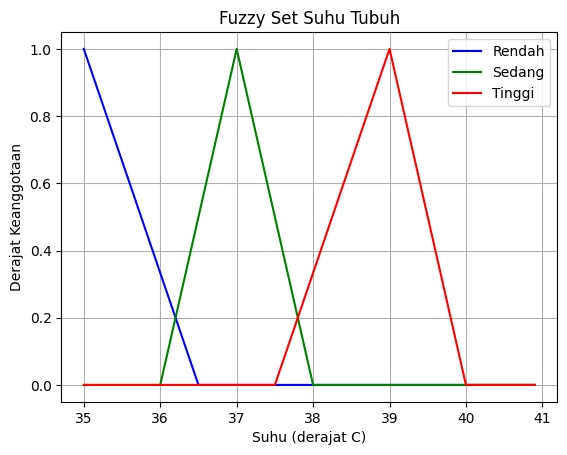

Derajat keanggotaan suhu 22 derajat C:
- Rendah : 0.00
- Sedang : 0.00
- Tinggi : 0.00


In [11]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Range suhu dari 35 sampai 41 derajat Celcius
suhu = np.arange(35, 41, 0.1)

# Fuzzy membership function
rendah = fuzz.trimf(suhu, [35, 35, 36.5])
sedang = fuzz.trimf(suhu, [36, 37, 38])
tinggi = fuzz.trimf(suhu, [37.5, 39, 40])

# Plot fuzzy set
plt.figure()
plt.plot(suhu, rendah, 'b', label='Rendah')
plt.plot(suhu, sedang, 'g', label='Sedang')
plt.plot(suhu, tinggi, 'r', label='Tinggi')
plt.title('Fuzzy Set Suhu Tubuh')
plt.xlabel('Suhu (derajat C)')
plt.ylabel('Derajat Keanggotaan')
plt.legend()
plt.grid(True)
plt.show()

# Input suhu untuk evaluasi
input_suhu = 22

# Hitung derajat keanggotaan
suhu_rendah = fuzz.interp_membership(suhu, rendah, input_suhu)
suhu_sedang = fuzz.interp_membership(suhu, sedang, input_suhu)
suhu_tinggi = fuzz.interp_membership(suhu, tinggi, input_suhu)

# Tampilkan hasil
print(f"Derajat keanggotaan suhu {input_suhu} derajat C:")
print(f"- Rendah : {suhu_rendah:.2f}")
print(f"- Sedang : {suhu_sedang:.2f}")
print(f"- Tinggi : {suhu_tinggi:.2f}")



**Index Kualitas Udara**

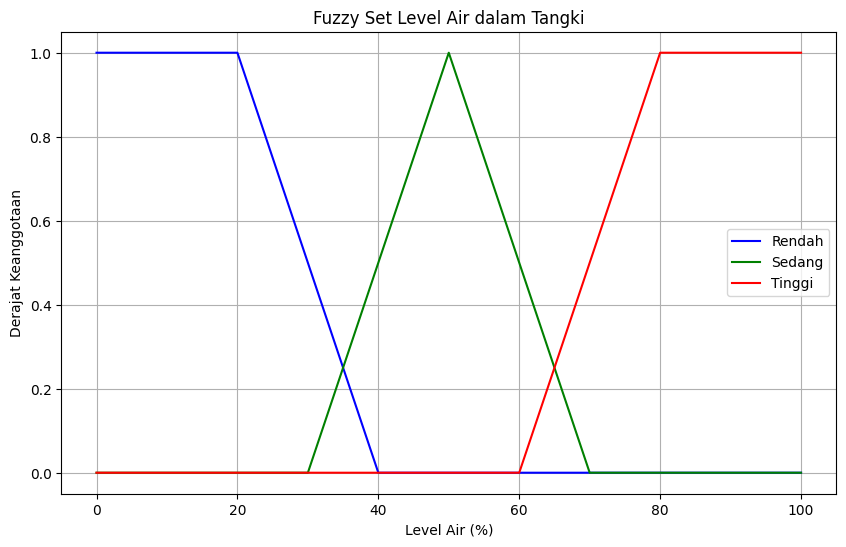

Derajat keanggotaan level air 28%:
- Rendah : 0.60
- Sedang : 0.00
- Tinggi : 0.00


In [16]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Universe of discourse
level = np.arange(0, 101, 1)

# Fuzzy sets
rendah = fuzz.trapmf(level, [0, 0, 20, 40])
sedang = fuzz.trimf(level, [30, 50, 70])
tinggi = fuzz.trapmf(level, [60, 80, 100, 100])

# Visualize fuzzy sets
plt.figure(figsize=(10, 6))
plt.plot(level, rendah, 'b', linewidth=1.5, label='Rendah')
plt.plot(level, sedang, 'g', linewidth=1.5, label='Sedang')
plt.plot(level, tinggi, 'r', linewidth=1.5, label='Tinggi')
plt.title('Fuzzy Set Level Air dalam Tangki')
plt.xlabel('Level Air (%)')
plt.ylabel('Derajat Keanggotaan')
plt.legend()
plt.grid(True)
plt.show()

# Calculate membership for a specific input
input_level = 28
level_rendah = fuzz.interp_membership(level, rendah, input_level)
level_sedang = fuzz.interp_membership(level, sedang, input_level)
level_tinggi = fuzz.interp_membership(level, tinggi, input_level)

# Output derajat keanggotaan
print(f"Derajat keanggotaan level air {input_level}%:")
print(f"- Rendah : {level_rendah:.2f}")
print(f"- Sedang : {level_sedang:.2f}")
print(f"- Tinggi : {level_tinggi:.2f}")


**Kontrol Air Conditioner**

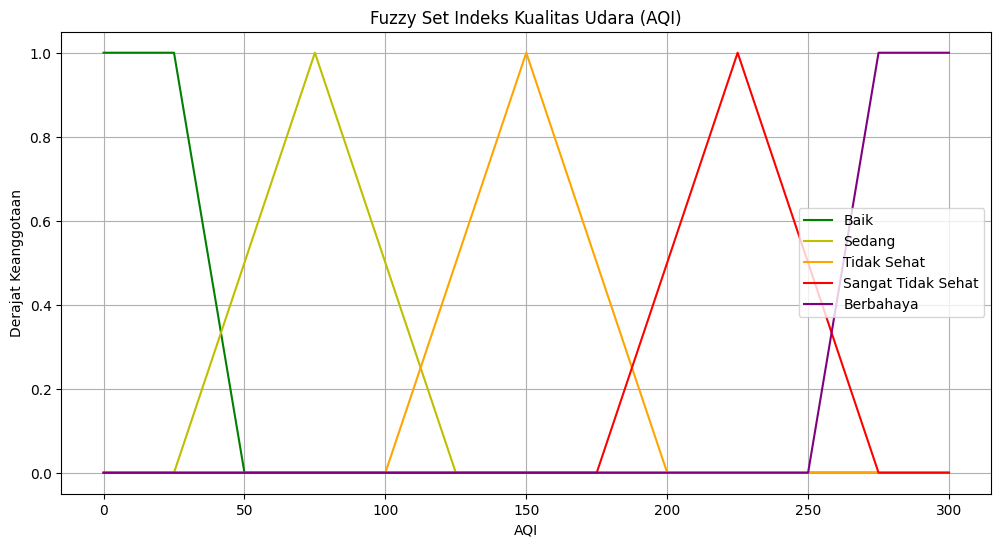

Derajat keanggotaan AQI 120:
- Baik              : 0.00
- Sedang            : 0.10
- Tidak Sehat       : 0.40
- Sangat Tidak Sehat: 0.00
- Berbahaya         : 0.00


In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Universe of discourse
aqi = np.arange(0, 301, 1)

# Fuzzy sets for Air Quality Index
baik = fuzz.trapmf(aqi, [0, 0, 25, 50])
sedang = fuzz.trimf(aqi, [25, 75, 125])
tidak_sehat = fuzz.trimf(aqi, [100, 150, 200])
sangat_tidak_sehat = fuzz.trimf(aqi, [175, 225, 275])
berbahaya = fuzz.trapmf(aqi, [250, 275, 300, 300])

# Visualize fuzzy sets
plt.figure(figsize=(12, 6))
plt.plot(aqi, baik, 'g', linewidth=1.5, label='Baik')
plt.plot(aqi, sedang, 'y', linewidth=1.5, label='Sedang')
plt.plot(aqi, tidak_sehat, 'orange', linewidth=1.5, label='Tidak Sehat')
plt.plot(aqi, sangat_tidak_sehat, 'r', linewidth=1.5, label='Sangat Tidak Sehat')
plt.plot(aqi, berbahaya, 'purple', linewidth=1.5, label='Berbahaya')
plt.title('Fuzzy Set Indeks Kualitas Udara (AQI)')
plt.xlabel('AQI')
plt.ylabel('Derajat Keanggotaan')
plt.legend()
plt.grid(True)
plt.show()

# Calculate membership for a specific input
input_aqi = 120
aqi_baik = fuzz.interp_membership(aqi, baik, input_aqi)
aqi_sedang = fuzz.interp_membership(aqi, sedang, input_aqi)
aqi_tidak_sehat = fuzz.interp_membership(aqi, tidak_sehat, input_aqi)
aqi_sangat_tidak_sehat = fuzz.interp_membership(aqi, sangat_tidak_sehat, input_aqi)
aqi_berbahaya = fuzz.interp_membership(aqi, berbahaya, input_aqi)

# Output derajat keanggotaan
print(f"Derajat keanggotaan AQI {input_aqi}:")
print(f"- Baik              : {aqi_baik:.2f}")
print(f"- Sedang            : {aqi_sedang:.2f}")
print(f"- Tidak Sehat       : {aqi_tidak_sehat:.2f}")
print(f"- Sangat Tidak Sehat: {aqi_sangat_tidak_sehat:.2f}")
print(f"- Berbahaya         : {aqi_berbahaya:.2f}")


**Fuzzy untuk mengatur kecepatan kipas AC** (Tugas E-Learning)

Untuk suhu 22°C dan kelembaban 75%, kecepatan kipas AC: 25.00%


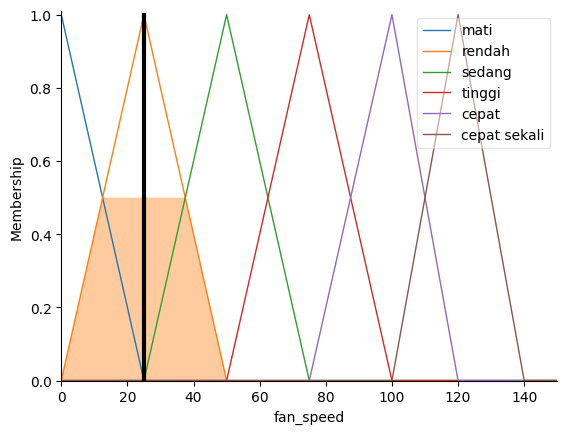

In [40]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Input variables
temperature = ctrl.Antecedent(np.arange(15, 41, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(20, 101, 1), 'humidity')

# Output variable
fan_speed = ctrl.Consequent(np.arange(0, 151, 1), 'fan_speed')

# Membership functions for temperature
temperature['dingin'] = fuzz.trapmf(temperature.universe, [15, 15, 20, 24])
temperature['nyaman'] = fuzz.trimf(temperature.universe, [22, 26, 30])
temperature['panas'] = fuzz.trapmf(temperature.universe, [28, 32, 40, 40])

# Membership functions for humidity
humidity['kering'] = fuzz.trapmf(humidity.universe, [20, 20, 30, 45])
humidity['normal'] = fuzz.trimf(humidity.universe, [35, 50, 65])
humidity['lembab'] = fuzz.trapmf(humidity.universe, [55, 70, 100, 100])
humidity['sangat lembab'] = fuzz.trapmf(humidity.universe, [90, 100, 100, 100])

# Membership functions for fan speed
fan_speed['mati'] = fuzz.trimf(fan_speed.universe, [0, 0, 25])
fan_speed['rendah'] = fuzz.trimf(fan_speed.universe, [0, 25, 50])
fan_speed['sedang'] = fuzz.trimf(fan_speed.universe, [25, 50, 75])
fan_speed['tinggi'] = fuzz.trimf(fan_speed.universe, [50, 75, 100])
fan_speed['cepat'] = fuzz.trimf(fan_speed.universe, [75, 100, 120])
fan_speed['cepat sekali'] = fuzz.trimf(fan_speed.universe, [100, 120, 140])

# Visualize membership functions (opsional)
# temperature.view()
# humidity.view()
# fan_speed.view()

# Define fuzzy rules
rule1 = ctrl.Rule(temperature['dingin'] & humidity['kering'], fan_speed['mati'])
rule2 = ctrl.Rule(temperature['dingin'] & humidity['normal'], fan_speed['mati'])
rule3 = ctrl.Rule(temperature['dingin'] & humidity['lembab'], fan_speed['rendah'])
rule4 = ctrl.Rule(temperature['nyaman'] & humidity['kering'], fan_speed['rendah'])
rule5 = ctrl.Rule(temperature['nyaman'] & humidity['normal'], fan_speed['sedang'])
rule6 = ctrl.Rule(temperature['nyaman'] & humidity['lembab'], fan_speed['tinggi'])
rule7 = ctrl.Rule(temperature['panas'] & humidity['kering'], fan_speed['tinggi'])
rule8 = ctrl.Rule(temperature['panas'] & humidity['normal'], fan_speed['tinggi'])
rule9 = ctrl.Rule(temperature['panas'] & humidity['lembab'], fan_speed['cepat'])
rule10 = ctrl.Rule(temperature['panas'] & humidity['sangat lembab'], fan_speed['cepat sekali'])

# Create control system
ac_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9,rule10])
ac = ctrl.ControlSystemSimulation(ac_ctrl)

# Input values
ac.input['temperature'] = 22
ac.input['humidity'] = 75

# Compute result
ac.compute()
print(f"Untuk suhu 22°C dan kelembaban 75%, kecepatan kipas AC: {ac.output['fan_speed']:.2f}%")

# Visualize result
fan_speed.view(sim=ac)
plt.show()


**Penjelasan**

jika suhu input diubah menjadi 22 maka ini akan merubah kecepatan dari kipas angin karena dengan mengganti suhu yang menjadi 22, otomatis sistem akan mendeteksi bahwa suhu ruangan rendah dan dipadukan dengan kelembapan yang tinggi maka kecepatan dari kipas angin akan berkurang.

lalu untuk penambahan variabel dari kelembaban, saya menambahkan variabel *sangat lembab*  dimana variiabel ini memiliki nilai keanggotaan fuzzy dari 90 hingga 100,
kemudian saya juga menambahkan variabel kecepatan kipas dengan **cepat sekali** dimana variabel ini memiliki nilai keanggotaan dari 100 sampai 140. saya juga merubah derajat keanggotaan dari cepat yang tadinta nilai nya hanya sampai 100 saya tambah menjadi 120 agar bisa menyatu dengan keanggotaan yang cepat sekali.
lalu saya menambahkan aturan baru yaitu **rule10** untuk if dan then nya.


```
rule10 = ctrl.Rule(temperature['panas'] & humidity['sangat lembab'], fan_speed['cepat sekali'])
```
dan juga memasukan aturanya ke dalam control sistem supaya bisa terbaca.


lalu *Mengapa suhu 28°C memiliki nilai keanggotaan di "Nyaman" dan "Panas"?*
karena suhu 28°C ini berada di derajat keanggotaan dari nyaman dan panas, karena keanggotaan nyaman berada dari nilai 22-30, dan keanggotaan panas berada di nilai 28-40. maka dari itu nilai 28 berada di tengah tengah dan nyaman dan panas memiliki derajat keanggotaan yang saling berpotongan, sehingga nilai 28 ini memiliki nilai keanggotaan di nyaman dan anas.

